# Linear Regression with Scikit-learn: The Diabetes dataset
M2U3 - Exercise 7

## What are we going to do?
- We will analyse the Scikit-learn diabetes sample dataset
- We will train a multivariate linear regression model on the dataset
- Examine the Lasso linear regression model
- We will compare the CV included in LassoCV with a manual CV

Remember to follow the instructions for the submission of assignments indicated in [Submission Instructions](https://github.com/Tokio-School/Machine-Learning-EN/blob/main/Submission_instructions.md).

# Linear Regression: Scikit-learn Diabetes dataset

## What are we going to do?
- We will analyse the Scikit-learn diabetes sample dataset
- We will train a multivariate linear regression model on the dataset
- We will examine the Lasso linear regression model
- We will compare the CV included in LassoCV with a manual CV

 For this exercise you can use the following references, among others:
- [Diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)
- [sklearn.datasets.load_diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)
- [Cross-validation on Diabetes dataset exercise](https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html)
- [sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [1]:
# TODO: Import all the necessary modules into this cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Load the Diabetes dataset

Before starting to work with a new dataset, it is worth reviewing its features and displaying some examples on screen to get an idea of what data it contains, in which format, etc:

*NOTE:* If you have experience using Pandas, you can use the dataframe.describe() function

In [2]:
# TODO: Load the Diabetes dataset
# First, load it as a Bunch object, analyse its features and show some examples
diabetes = load_diabetes()

diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df["target"] = diabetes.target

print(diabetes.DESCR)
print("\nFirst 5 rows of the dataset:")
print(diabetes_df.head())

print("\nStatistical summary:")
diabetes_df.describe().round(3)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,152.133
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,77.093
min,-0.107,-0.045,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138,25.000
25%,-0.037,-0.045,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033,87.000
50%,0.005,-0.045,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001,140.500
75%,0.038,0.051,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028,211.500
max,0.111,0.051,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136,346.000


## Preprocess the data
- Randomly reorder the data
- Normalise the data
- Divide the dataset into training and test subsets

*Note*: Before normalising the data from a new dataset, check whether it is necessary and ensure it has not already been normalised.

*Hint*: [Diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#:~:text=blood%20sugar%20level-,Note,-%3A%20Each%20of%20these)

In [3]:
# TODO: Randomly reorder and normalise the data and split the dataset into 2 subsets, as needed

diabetes_df = diabetes_df.sample(frac=1, random_state=42).reset_index(drop=True)

# The data has already been normalized

X = diabetes_df.drop(columns="target")
y = diabetes_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train an initial model

- Train an initial model on the training subset without regularisation.
- Test the suitability of the model.
- Check if there is any deviation or overfitting on the test subset(on this occasion).

If so, revert to using a simpler linear regression model, such as LinearRegression:

In [4]:
# TODO: Train a simpler linear regression model on the training subset without regularisation.
model = LinearRegression(fit_intercept=True).fit(X_train, y_train)

In [5]:
# TODO: Test the suitability of the model by evaluating it on the test set using various metrics
y_pred = model.predict(X_test)

r2 = model.score(X_test, y_test)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

print("R²:", r2)
print("MSE:", mse)
print("MAE:", mae)

R²: 0.3799420944210936
MSE: 2611.1065031321436
MAE: 42.351166469118155


The model explains about 38% of the variability in the target variable, and the average prediction error is around 43. This indicates a moderate performance — not bad, but there’s still room for improvement.

In [6]:
# TODO: Check if the evaluation on both subsets is similar with the RMSE
y_pred_train = model.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mse)

print("RMSE (train):", rmse_train)
print("RMSE (test):", rmse_test)


RMSE (train): 54.3323883299091
RMSE (test): 51.0989873004558


The model shows similar RMSE values for training and test sets, indicating good generalization and no signs of overfitting.

## Train the model with CV

- Train a model for each regularisation value to be considered.
- Train and evaluate them on the training subset using K-fold.
- Choose the optimal model and its regularisation.

Train the model using the [Lasso algorithm](https://scikit-learn.org/stable/modules/linear_model.html#lasso):



In [7]:
# TODO: Train a different model for each alpha on a different K-fold, evaluate them and select
# the most accurate model using GridSearchCV

grid = GridSearchCV(estimator = Lasso(), param_grid={"alpha": np.logspace(-4, 2, 20)}, scoring="neg_mean_squared_error",
                    cv=KFold(n_splits=5, shuffle=True, random_state=42)).fit(X_train, y_train)


print("Best alpha:", grid.best_params_['alpha'])
print("CV MSE:", -grid.best_score_)

best_model = grid.best_estimator_
y_pred_test = best_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))


print("Test RMSE:", rmse_test)


Best alpha: 0.06951927961775606
CV MSE: 3133.6492405638537
Test RMSE: 51.02931984685491


*Optional bonus*: : Do you have the courage to plot the same graphical representation of the evaluation of each model for multiple *alphas*?

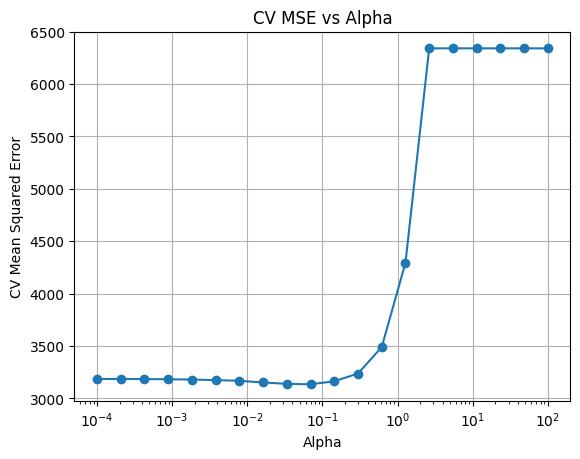

In [8]:
mean_mse = -grid.cv_results_["mean_test_score"]


plt.plot(grid.param_grid["alpha"], mean_mse, marker="o")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("CV Mean Squared Error")
plt.title("CV MSE vs Alpha")
plt.grid(True)
plt.show()



- Calculate the residuals for the test subset and plot them.

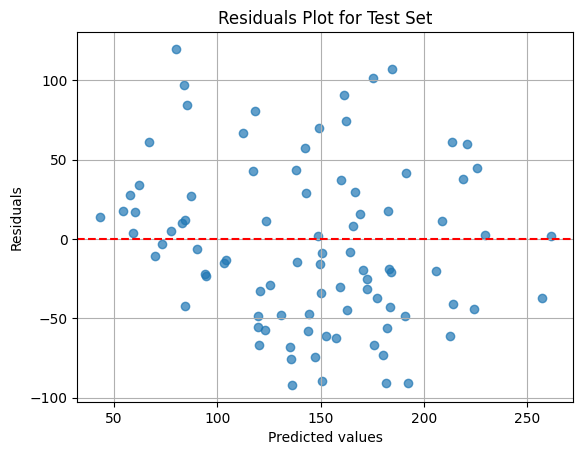

In [9]:
residuals = y_test - y_pred_test

plt.scatter(y_pred_test, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Test Set")
plt.grid(True)
plt.show()
